In [48]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as spim
from porespy.tools import norm_to_uniform
import phantom_generator as pg
from scipy.ndimage import gaussian_filter1d
from porespy.tools import norm_to_uniform

import seaborn as sns

# Пайплайн на 1 фантоме

In [2]:
shape = (1000, 1000)

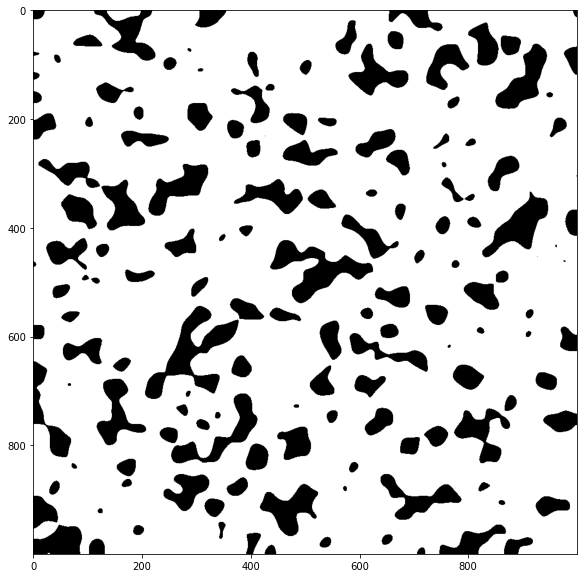

In [15]:
characteristical_pore_length = 12
porosity = 0.2
phantom = pg.gen_phantom(shape, porosity, characteristical_pore_length)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(phantom, cmap='gray')

<class 'numpy.ndarray'>


[(0.0, 1000.0), (0.0, 1000.0)]

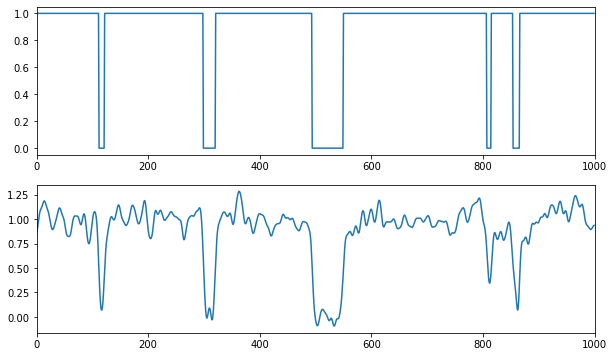

In [23]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10,2*3))

sig = phantom[500].astype(float)
axes[0].plot(sig)

noise = np.random.normal(0,0.3,sig.size)
print(type(noise))
sig += noise
sig = gaussian_filter1d(sig, 3)

axes[1].plot(sig)

[ax.set_xlim(0, sig.size) for ax in axes]


(0.0, 1000.0)

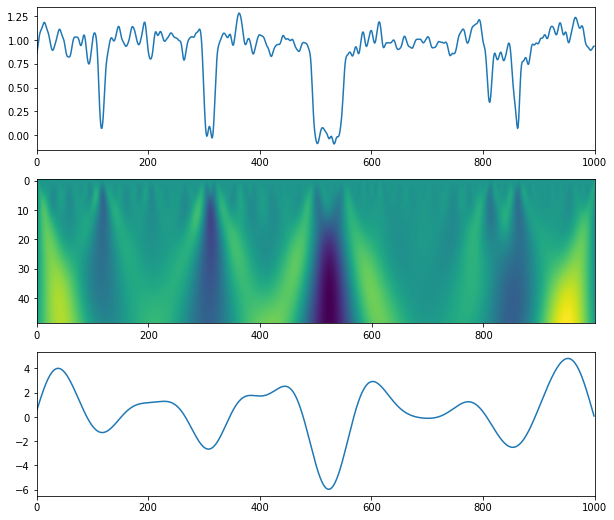

In [24]:
from scipy import signal, stats

# def inverted_ricker(points, a):
#     sig = signal.ricker(points, a)
#     return (sig - sig.min()) / (sig.max() - sig.min())

widths = np.arange(1, 50)
cwtmatr = signal.cwt(sig, signal.ricker, widths)

fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10,3*3))
axes[0].plot(sig)
axes[0].set_xlim(0, sig.size) 

axes[1].imshow(cwtmatr, aspect='auto')

axes[2].plot(cwtmatr[40])
axes[2].set_xlim(0, sig.size) 

Text(0.5, 1.0, 'max: 21, length: 12')

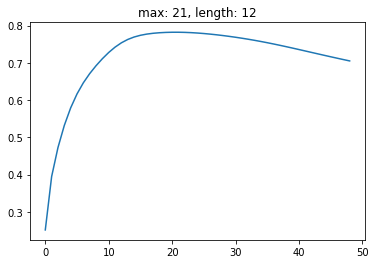

In [27]:
pearsons = [stats.pearsonr(row, sig)[0] for row in cwtmatr]
plt.plot(pearsons)
plt.title(f"max: {np.argmax(pearsons)}, length: {characteristical_pore_length}")

In [40]:
def noise_signal(sig):
    sig = sig.astype(float)
    noise = np.random.normal(0,0.3,sig.size)
    sig += noise
    sig = gaussian_filter1d(sig, 3)
    
    return sig


def get_width(sig):
    widths = np.arange(1, 50)
    cwtmatr = signal.cwt(sig, signal.ricker, widths)
    pearsons = [stats.pearsonr(row, sig)[0] for row in cwtmatr]

    return np.argmax(pearsons)




characteristical_pore_length = 10
porosity = 0.5
shape = [1000, 1000]
phantom = pg.gen_phantom(shape, porosity, characteristical_pore_length)

widths = []

for row in phantom:
    w = get_width(noise_signal(row))
    widths.append(w)


Text(0.5, 1.0, 'mean: 17.264, std 4.62')

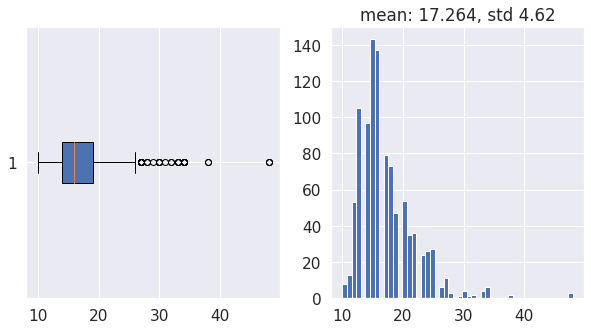

In [57]:
sns.set(style="darkgrid", font_scale=1.4)

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].boxplot(widths, patch_artist=True, vert=False)
_ = axes[1].hist(widths, bins=50)
axes[1].set_title(f"mean: {np.mean(widths)}, std {np.std(widths):.2f}")

In [48]:
import h5py

h5f = h5py.File('sample.h5','r')

img2d = h5f['layer1'][:]
h5f.close()

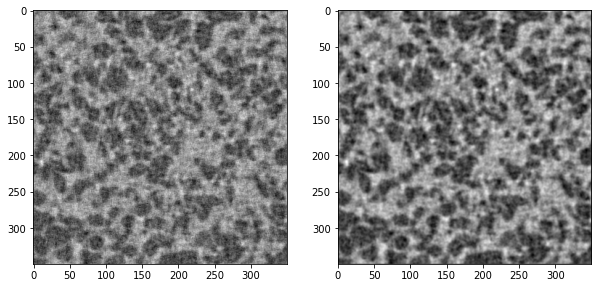

In [61]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].imshow(img2d, cmap='gray')

kernal = np.asarray([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]]) / 9
img2d_filt = signal.fftconvolve(img2d, kernal, mode='same')
axes[1].imshow(img2d_filt, cmap='gray')


(0.0, 350.0)

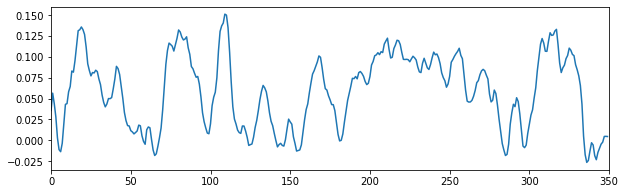

In [63]:
fig, ax = plt.subplots(figsize=(10,3))

real_sig = img2d_filt[200]
ax.plot(real_sig)
ax.set_xlim(0, real_sig.size)



(0.0, 350.0)

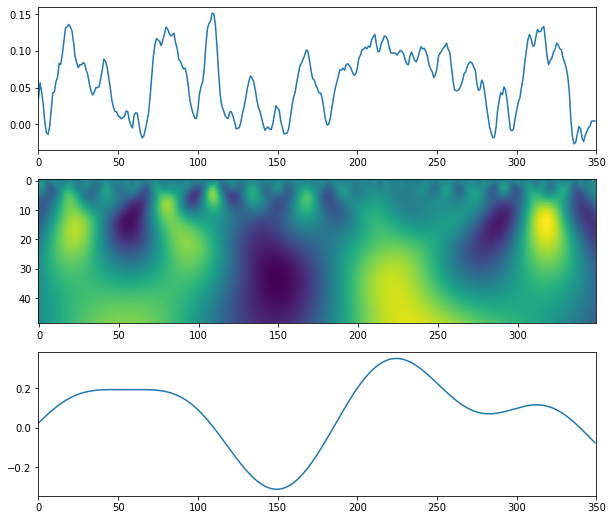

In [64]:
widths = np.arange(1, 50)
cwtmatr = signal.cwt(real_sig, signal.ricker, widths)

fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10,3*3))
axes[0].plot(real_sig)
axes[0].set_xlim(0, real_sig.size) 

axes[1].imshow(cwtmatr, aspect='auto')

axes[2].plot(cwtmatr[40])
axes[2].set_xlim(0, real_sig.size) 

Text(0.5, 1.0, 'max: 7, length: 25')

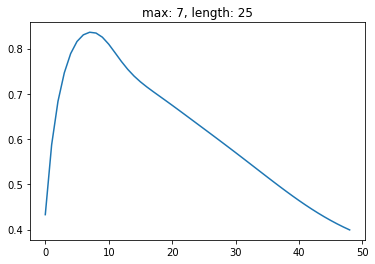

In [65]:
pearsons = [stats.pearsonr(row, real_sig)[0] for row in cwtmatr]
plt.plot(pearsons)
plt.title(f"max: {np.argmax(pearsons)}, length: {characteristical_pore_length}")

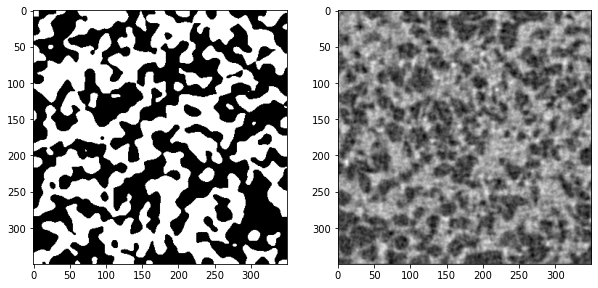

In [70]:
fig, axes = plt.subplots(ncols=2, figsize=(2*5,5))
axes[0].imshow(pg.gen_phantom(img2d_filt.shape, 0.5, 5), cmap='gray')
axes[1].imshow(img2d_filt, cmap='gray')